In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import linear regression model
from sklearn.linear_model import LinearRegression
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing as pp
import statsmodels.api as sm

In [3]:
A=pd.read_excel("German Credit.xlsx")

In [4]:
A.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


In [6]:
A.shape

(1000, 3)

in your data(n x p) you should always check if n>>p^2. if not satisfied, collect  more samples

if n<p^2, you can reduce dimensions(p)

In [7]:
A['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

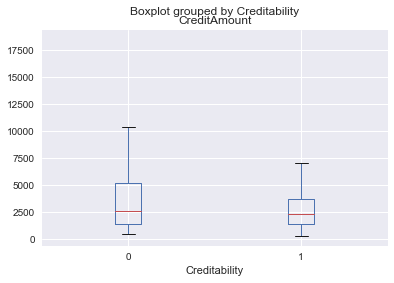

In [12]:
A.boxplot(column='CreditAmount', by= 'Creditability')

In [16]:
data= A[['Creditability','CreditAmount']]

In [17]:
data.head()


,Creditability,CreditAmount
0,1,1049
1,1,2799
2,1,841
3,1,2122
4,1,2171


(array([ 26.,  87., 124., 121.,  87.,  84.,  63.,  54.,  43.,  49.,  31.,
         24.,  19.,  16.,   7.,  16.,  22.,  14.,  11.,  17.,  13.,   7.,
          7.,   4.,   7.,   5.,   2.,   5.,   3.,   4.,   1.,   4.,   4.,
          2.,   3.,   1.,   0.,   2.,   3.,   2.,   1.,   0.,   3.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  250.  ,   613.48,   976.96,  1340.44,  1703.92,  2067.4 ,
         2430.88,  2794.36,  3157.84,  3521.32,  3884.8 ,  4248.28,
         4611.76,  4975.24,  5338.72,  5702.2 ,  6065.68,  6429.16,
         6792.64,  7156.12,  7519.6 ,  7883.08,  8246.56,  8610.04,
         8973.52,  9337.  ,  9700.48, 10063.96, 10427.44, 10790.92,
        11154.4 , 11517.88, 11881.36, 12244.84, 12608.32, 12971.8 ,
        13335.28, 13698.76, 14062.24, 14425.72, 14789.2 , 15152.68,
        15516.16, 15879.64, 16243.12, 16606.6 , 16970.08, 17333.56,
        17697.04, 18060.52, 18424.  ]),
 <a list of 50 Patch objects>)

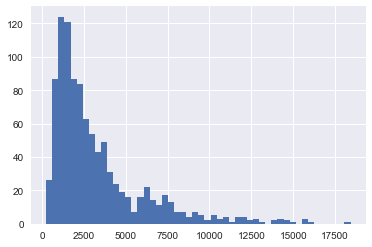

In [18]:
plt.hist(data['CreditAmount'],50)

In [25]:
amt_intpts=np.array([0,500,1000,1500,2000,2500,5000,7500,10000,15000,20000])
amt_intpts

array([    0,   500,  1000,  1500,  2000,  2500,  5000,  7500, 10000,
       15000, 20000])

In [32]:
amt_int=[(amt_intpts[i]+int(i!=0),amt_intpts[i+1]) for i in np.arange(len(amt_intpts)-1) ]
amt_int

[(0, 500),
 (501, 1000),
 (1001, 1500),
 (1501, 2000),
 (2001, 2500),
 (2501, 5000),
 (5001, 7500),
 (7501, 10000),
 (10001, 15000),
 (15001, 20000)]

In [35]:
creditability0=[]
creditability1=[]
for interval in amt_int:
    subData=data[data.CreditAmount>=interval[0]]
    subData=subData[data.CreditAmount<=interval[1]]
    creditability0.append(sum(subData.Creditability==0))
    creditability1.append(sum(subData.Creditability==1))

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be

In [42]:
creditability0, creditability1

([3, 34, 51, 33, 26, 75, 34, 20, 21, 3],
 [15, 64, 139, 93, 79, 200, 68, 26, 14, 2])

In [43]:
amt_int_df=pd.DataFrame(amt_int, columns=['intervalLeftSide','intervalRightSide'])
amt_int_df

,intervalLeftSide,intervalRightSide
0,0,500
1,501,1000
2,1001,1500
3,1501,2000
4,2001,2500
5,2501,5000
6,5001,7500
7,7501,10000
8,10001,15000
9,15001,20000


In [49]:
temp_df=pd.DataFrame(np.column_stack([creditability0,creditability1]), columns=['Credibility0','Credibility1'])
temp_df

,Credibility0,Credibility1
0,3,15
1,34,64
2,51,139
3,33,93
4,26,79
5,75,200
6,34,68
7,20,26
8,21,14
9,3,2


In [57]:
compareCreditworthinessdf=pd.concat([amt_int_df.reset_index(drop=True),temp_df], axis=1)

In [58]:
compareCreditworthinessdf

,intervalLeftSide,intervalRightSide,Credibility0,Credibility1
0,0,500,3,15
1,501,1000,34,64
2,1001,1500,51,139
3,1501,2000,33,93
4,2001,2500,26,79
5,2501,5000,75,200
6,5001,7500,34,68
7,7501,10000,20,26
8,10001,15000,21,14
9,15001,20000,3,2


In [59]:
compareCreditworthinessdf['Total']=compareCreditworthinessdf.Credibility0 + compareCreditworthinessdf.Credibility1

In [60]:
compareCreditworthinessdf

,intervalLeftSide,intervalRightSide,Credibility0,Credibility1,Total
0,0,500,3,15,18
1,501,1000,34,64,98
2,1001,1500,51,139,190
3,1501,2000,33,93,126
4,2001,2500,26,79,105
5,2501,5000,75,200,275
6,5001,7500,34,68,102
7,7501,10000,20,26,46
8,10001,15000,21,14,35
9,15001,20000,3,2,5


In [63]:
#no.of records into percentage
compareCreditworthinessdf.Credibility0=round(compareCreditworthinessdf.Credibility0/compareCreditworthinessdf.Total,2)

compareCreditworthinessdf.Credibility1=round(compareCreditworthinessdf.Credibility1/compareCreditworthinessdf.Total,2)

In [64]:
compareCreditworthinessdf

,intervalLeftSide,intervalRightSide,Credibility0,Credibility1,Total
0,0,500,0.17,0.83,18
1,501,1000,0.35,0.65,98
2,1001,1500,0.27,0.73,190
3,1501,2000,0.26,0.74,126
4,2001,2500,0.25,0.75,105
5,2501,5000,0.27,0.73,275
6,5001,7500,0.33,0.67,102
7,7501,10000,0.43,0.57,46
8,10001,15000,0.60,0.40,35
9,15001,20000,0.60,0.40,5


Text(0.5,1,'Credit Worthiness for Credibility==0')

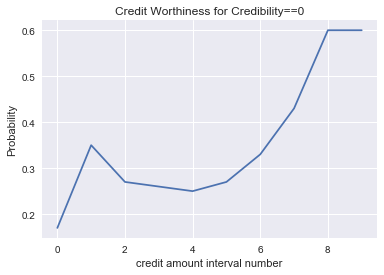

In [71]:
plt.plot(compareCreditworthinessdf.Credibility0 )
plt.xlabel("credit amount interval number")
plt.ylabel("Probability")
plt.title("Credit Worthiness for Credibility==0")

Text(0.5,1,'Credit Worthiness for Credibility==1')

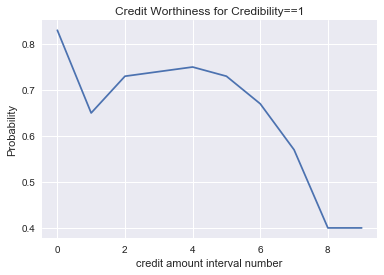

In [72]:
plt.plot(compareCreditworthinessdf.Credibility1 )
plt.xlabel("credit amount interval number")
plt.ylabel("Probability")
plt.title("Credit Worthiness for Credibility==1")

In [73]:
#prepare input data for the model
X=np.array(data.CreditAmount)
Y=data.Creditability.astype('category')

In [123]:
#fit logistic regression model
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y, test_size=0.3,random_state=1)

In [124]:
logit=sm.Logit(Ytrain,sm.add_constant(Xtrain)) # independent variable should be in add_constant

In [125]:
lg=logit.fit()

Optimization terminated successfully.
         Current function value: 0.597801
         Iterations 5


In [126]:
lg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.019     
Dependent Variable: Creditability    AIC:              840.9208  
Date:               2018-11-21 17:52 BIC:              850.0230  
No. Observations:   700              Log-Likelihood:   -418.46   
Df Model:           1                LL-Null:          -426.75   
Df Residuals:       698              LLR p-value:      4.6449e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const      1.2460     0.1299    9.5924   0.0000    0.9914    1.5006
x1        -0.0001     0.0000   -4.0571   0.0000   -0.0002   -0.0001
=================================================================

"""

In [127]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Creditability   No. Observations:                  700
Model:                          Logit   Df Residuals:                      698
Method:                           MLE   Df Model:                            1
Date:                Wed, 21 Nov 2018   Pseudo R-squ.:                 0.01943
Time:                        17:52:28   Log-Likelihood:                -418.46
converged:                       True   LL-Null:                       -426.75
                                        LLR p-value:                 4.645e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2460      0.130      9.592      0.000       0.991       1.501
x1            -0.0001   2.83e-05     -4.057      0.000      -0.000   -5.93e-05
==============================================================================
"""

In [128]:
#test accuracy
def get_prediction(Ytest,model):
    y_pred_df=pd.DataFrame( { 'actual': Ytest,
                            'predicted_prob':lg.predict(sm.add_constant(Xtest)) } )
    return y_pred_df

In [129]:
Xtest[0:5]

array([6842, 1237, 7308, 1403, 1568], dtype=int64)

In [130]:
y_pred_df=get_prediction(Xtest,lg)
y_pred_df['OriginalCredibility']=np.array(Ytest)
y_pred_df[0:5]

,actual,predicted_prob,OriginalCredibility
0,6842,0.613388,1
1,1237,0.751042,0
2,7308,0.600644,1
3,1403,0.747467,1
4,1568,0.743879,1


In [131]:
y_pred_df['predicted']= y_pred_df.predicted_prob.map(lambda x:1 if x>0.6 else 0)

In [132]:
y_pred_df[0:10]

,actual,predicted_prob,OriginalCredibility,predicted
0,6842,0.613388,1,1
1,1237,0.751042,0,1
2,7308,0.600644,1,1
3,1403,0.747467,1,1
4,1568,0.743879,1,1
5,14421,0.399551,0,0
6,1275,0.750226,1,1
7,15672,0.365688,0,0
8,1360,0.748396,1,1
9,1382,0.747921,1,1


In [140]:
# build a confusion matrix
def draw_cm(actual,predicted):
    cm=metrics.confusion_matrix(actual,predicted, [1,0])
    sns.heatmap(cm,annot=True, fmt='.2f',xticklabels=['Default', 'No Default'], yticklabels=['Default', 'No Default'])
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()

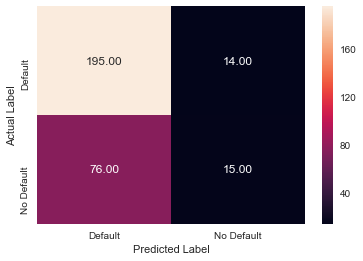

In [141]:
draw_cm(y_pred_df.OriginalCredibility,y_pred_df.predicted)

In [135]:
Ytest.value_counts()

1    209
0     91
Name: Creditability, dtype: int64

In [ ]:
# specificity is high, sensitivity is high